In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citiesData = pd.read_csv(city_data_to_load)
ridesData = pd.read_csv(ride_data_to_load)
print(citiesData.size)

# Combine the data into a single dataset
data = pd.merge(ridesData, citiesData, on="city", how="outer" )
data1 = pd.merge(ridesData.drop_duplicates('city'), citiesData, on="city", how="outer" )


# Display the data table for preview

data1.head(5)

360


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

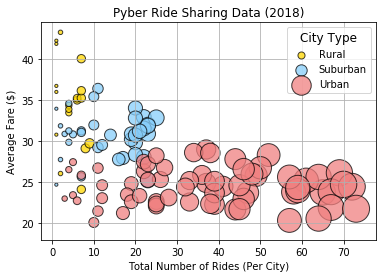

In [10]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

info = data.groupby(['type', 'city'])
colors = ["gold", "lightskyblue", "lightcoral"]

price = {'driver_count':'mean', 'fare':['unique', 'sum','mean']}
info = pd.DataFrame(info.agg(price))
info = info.reset_index()
#df.columns = df.columns.get_level_values(0)
info.columns = ['cityType', 'cityName', 'driverCount', 'faresList', 'sum', 'mean']

plt.title("Pyber Ride Sharing Data (2018)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

for eachType, color in zip((info['cityType'].unique()), colors):
    graphData = info.loc[info['cityType']==eachType, ['driverCount', 'mean']]
    x_axis, dataY = graphData['driverCount'], graphData['mean']
    #print(data)
    plt.scatter(x_axis, dataY,  marker="o", facecolors=color, edgecolors="black", linewidths=1,
            s=x_axis*10, alpha=0.75 ,label = eachType)

plt.legend(title='City Type', title_fontsize=12)
plt.savefig("BubblePlot.png")
plt.show()    




In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

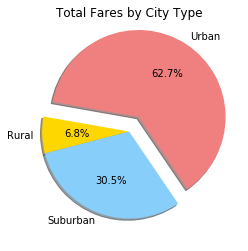

In [16]:
# Calculate Type Percents

Fares = data.groupby('type')['fare'].sum()
Percentage = Fares/sum(Fares)
TotalFaresByCityType = pd.DataFrame({"TotalFares":Fares, "Percentage":Percentage})

# Build Pie Chart
# Labels for the sections of our pie chart
labels = list(TotalFaresByCityType.index)

# The values of each section of the pie chart
sizes = TotalFaresByCityType['Percentage'] * 100

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.2)
# Tells matplotlib to seperate the "Python" section from the others
plt.title("Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)
plt.savefig("Pie1.png")

plt.show()


## Total Rides by City Type

[18.0, 12.0]


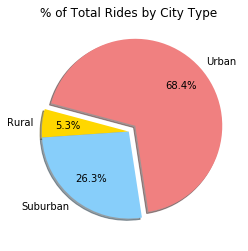

In [37]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

Fares = data.groupby('type')['ride_id'].count()
Percentage = Fares/sum(Fares)
TotalFaresByCityType = pd.DataFrame({"TotalNumOfRides":Fares, "Percentage":Percentage})

# Build Pie Chart
# Labels for the sections of our pie chart
labels = list(TotalFaresByCityType.index)

# The values of each section of the pie chart
sizes = TotalFaresByCityType['Percentage'] * 100

# The colors of each section of the pie chart
#Gold, Light Sky Blue, and Light Coral


explode = (0, 0, 0.2)
# Tells matplotlib to seperate the "Python" section from the others
plt.title("% of Total Rides by City Type")
fig_size = [scale * 3 for scale in plt.rcParams["figure.figsize"] ]
#plt.rcParams["figure.figsize"] = fig_size
print(fig_size)
#chart1 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.pie(sizes, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)

plt.savefig("Pie2.png")
plt.show()



## Total Drivers by City Type

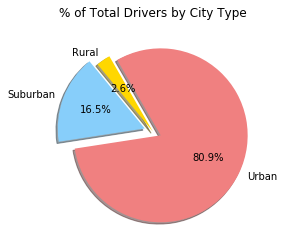

In [32]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

Fares = data1.groupby('type')['driver_count'].sum()
Percentage = Fares/sum(Fares)
TotalFaresByCityType = pd.DataFrame({"TotalNumOfRides":Fares, "Percentage":Percentage})

# Build Pie Chart
# Labels for the sections of our pie chart
labels = list(TotalFaresByCityType.index)

# The values of each section of the pie chart
sizes = TotalFaresByCityType['Percentage'] * 100

# The colors of each section of the pie chart
#Gold, Light Sky Blue, and Light Coral
colors = ["gold", "lightskyblue", "lightcoral"]

def get_percent(value):
    '''Formats float values in pie slices to percent.'''
    return "%2.1f%%" % (value)

explode = (0, 0.1, 0.1)
# Tells matplotlib to seperate the "Python" section from the others
plt.title("% of Total Drivers by City Type")
#plt.figure(figsize=(5,3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,  shadow=True, startangle=120, autopct=get_percent)
plt.savefig("Pie3.png")
plt.show()